# Υλοποιήση της παραγοντοποίησης QR ενός πίνακα A χρησιμοποιώντας την μέθοδο Gram-Schmidt:

In [530]:
import numpy as np
def QR(A):

    n=A.shape[0]
    Q=np.matrix(np.zeros((n,n)))
    for i in range(0,n):
        q=A[0:n,i]
        for j in range(0,i):
            len1=np.sum(A[0:n,i].T * Q[0:n,j])
            q=q-len1*Q[0:n,j]
        Q[0:n,i]=q/np.linalg.norm(q) 

    R=Q.T*A
    return Q,R
      


# Υλοποιήση μιας συνάρτησης , η οποία δημιουργεί έναν πίνακα Hilbert τάξης n. Έπειτα, ορίζεται μια μεταβλητή k και εκτυπώνεται ο πίνακας Hilbert τάξης k χρησιμοποιώντας τη παρακάτω συνάρτηση.

In [531]:

def Hilbert(n):
   
    H=np.matrix(np.zeros((n,n)))
    for i in range(0,n):
        for j in  range(0,n):
            H[i,j]=1/(i+j+1)
    
   
    return(H) 
k=5
print(Hilbert(k))


[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]


# Δημιουργία ενός διανύσματος με στοιχεία ίσα με 1.

In [532]:
b=np.ones((k,1))
print(b)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


# Υλοποιήση της παραγοντοποίησης LU ενός πίνακα A : 

In [533]:
def LU(A):
    n=A.shape[0]
    L=np.matrix(np.identity(n))
    for i in range(0,n-1):
        for j in range(i+1,n):
            mult=A[j,i]/A[i,i]
            L[j,i]=mult
            A[j,0:n]=A[j,0:n]-A[i,0:n]*mult
    U=A


    return L,U


# Επίλυση του συστήματος Hx = b με παραγοντοποιήση LU.

Όπου H είναι ο πίνακας Hilbert τάξης k και b το διάνυσμα με στοιχεία ίσα με 1.

Το διάνυσμα y υπολογίζεται λύνοντας το σύστημα L * y = b.

Το διάνυσμα x υπολογίζεται λύνοντας το σύστημα U * x = y.

In [534]:

A=Hilbert(k)

L,U=LU(Hilbert(k))
y= np.linalg.inv(L)*b
x= np.linalg.inv(U)*y

print(x)

#print(np.linalg.inv(Hilbert(k))*b)

[[    5.]
 [ -120.]
 [  630.]
 [-1120.]
 [  630.]]


Ελάχιστη μεταβολή της τιμής του πρώτου στοιχείου του b.

In [535]:
bnew=np.array(np.ones((k,1)))
bnew[0]=b[0]+10**(-15)
print(bnew)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


Επίλυση του συστήματος Hxnew = bnew.

In [536]:

Lnew,Unew=LU(Hilbert(k))
ynew= np.linalg.inv(Lnew)*bnew
xnew= np.linalg.inv(Unew)*ynew
print(xnew)


[[    5.]
 [ -120.]
 [  630.]
 [-1120.]
 [  630.]]


Η παρακάτω συνάρτηση υπολογίζει τη μέγιστη απόλυτη διαφορά μεταξύ των λύσεων δύο συστημάτων γραμμικών εξισώσεων που προκύπτουν από την τροποποίηση του πρώτου στοιχείου του διανύσματος b.

In [551]:

def getnorm(u):


    c=np.ones((u,1))
    cnew=np.array(np.zeros((u,1)))


    for i in range(0,u):
        if(i==0):
            cnew[i]=1+10**(-15)
        else:
            cnew[i]=1
    
    l,o=LU(Hilbert(u))
    t= np.linalg.inv(l)*c
    f= np.linalg.inv(o)*t
    lnew,onew=LU(Hilbert(u))
    tnew= np.linalg.inv(lnew)*cnew
    fnew= np.linalg.inv(onew)*tnew
    
    #print(np.max(np.abs(f-fnew)))      
    return np.max(np.abs(f-fnew))

# Το παρακάτω διάγραμμα παρουσιάζει τις μέγιστες απόλυτες διαφορές μεταξύ δύο λύσεων ενός συστήματος γραμμικών εξισώσεων Hx = b.
Ο άξονας x αντιστοιχεί στο μέγεθος του πίνακα H (τον αριθμό των γραμμών και στηλών), ενώ ο άξονας y αναπαριστά τη μέγιστη απόλυτη διαφορά ανάμεσα στις δύο λύσεις του συστήματος.

Γενικά, περιμένουμε ότι όσο αυξάνεται η διάσταση u του πίνακα Hilbert, η μέγιστη απόλυτη διαφορά μεταξύ των λύσεων θα αυξάνεται επίσης. Αυτό συμβαίνει, επειδή η επίδραση της αρχικής μετάβολης του πρώτου στοιχείου του διανύσματος b διακρίνεται καθώς η διάσταση u του συστήματος αυξάνεται.Δηλαδή, το μέγιστο σφάλμα που προκύπτει από την ελάχιστη μεταβολή του πρώτου στοιχείου του διανύσματος b στο σύστημα γραμμικών εξισώσεων αυξάνεται όσο μεγαλώνει και η διάσταση u του συστήματος, όπως φαίνεται εν τέλει και στο διάγραμμα.

Επομένως, παρατηρείται και απο το διάγραμμα ότι:

-Η απότομη κλίση στο διάγραμμα υποδεικνύει ότι ο πίνακας Hilbert επηρεάζεται εύκολα ακόμα και από πολύ μικρές αλλαγές στο διάνυσμα b και μπορεί να οδηγήσει σε μη ακριβείς λύσεις.

-Η λύση του συστήματος γίνεται πιο ανακριβής όσο αυξάνεται η διάσταση u του πίνακα Hilbert.

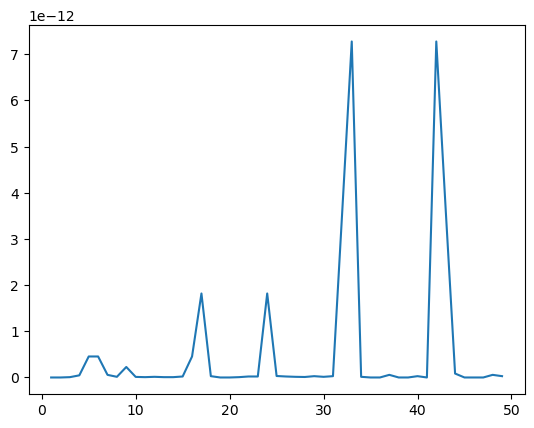

In [552]:
import matplotlib.pyplot as mlt
k=50
d=np.arange(1,k,1)
function=np.array(np.zeros((k-1)))
for i in range(2,k-1):
    function[i]=getnorm(i)

#print(function)
#print(d)
mlt.plot(d,function)
mlt.show()

Η παρακάτω συνάρτηση υπολογίζει τον πίνακα Hilbert τάξης i και τον αντίστροφο του. Έπειτα, υπολογίζει τη μέγιστη απόλυτη διαφορά του πίνακα Hilbert και του αντίστροφου του.

In [539]:
def getInorm(i):
    
    A=Hilbert(i)*np.linalg.inv(Hilbert(i))
        #print(np.max(np.abs(A-np.identity(i))))
    return np.max(np.abs(A-np.identity(i)))

# Το παρακάτω διάγραμμα παρουσιάζει τη μέγιστη απόλυτη διαφορά μεταξύ του πίνακα Hilbert τάξης i και του αντίστροφου πίνακα Hilbert τάξης i. 
Ο άξονας x αντιστοιχεί σε κάθε τάξη i του πίνακα Hilbert απο 1 εώς 8, ενώ ο άξονας y αναπαριστά τη μέγιστη απόλυτη διαφορά μεταξύ του πίνακα Hilbert και του αντίστροφου πίνακα Hilbert.

Από το διάγραμμα φαίνεται ότι με την αύξηση της τάξης i αυξάνεται η διαφορά μεταξύ του πίνακα Hilbert και του αντίστροφου του. Όταν το σημείο στο διάγραμμα είναι κοντά στο μηδέν, ο πίνακας Hilbert και ο αντίστροφός του είναι παρόμοιοι. Αν το σημείο στο διάγραμμα θα απομακρύνεται από το μηδέν, ο πίνακας Hilbert και ο αντίστροφός του είναι διαφορετικοί.

Επομένως ,αν η μέγιστη απόλυτη διαφορά είναι μικρή τότε, ο πίνακας Hilbert είναι σταθερός. Αυτό σημαίνει ότι μπορούμε να επιλύσουμε το σύστημα Hx = b με ακρίβεια χρησιμοποιώντας τον αντίστροφο του πίνακα Hilbert.

Ωστόσο, αν η μέγιστη απόλυτη διαφορά είναι μεγάλη, ο πίνακας Hilbert είναι ασταθής. Αυτό σημαίνει ότι η επίλυση του συστήματος Hx = b μπορεί να είναι ανακριβής χρησιμοποιώντας τον αντίστροφο του πίνακα Hilbert.

Συμπερασματικά, το διάγραμμα μπορεί να μας δώσει την ακρίβεια της λύσης του συστήματος Hx = b όταν χρησιμοποιούμε τον πίνακα Hilbert και τον αντίστροφό του.

[0.00000000e+00 0.00000000e+00 3.70074342e-17 3.68594044e-15
 3.88578059e-14 1.73723998e-12 5.95823996e-11 2.01905526e-09
 5.26857409e-08 1.50073133e-06 3.28645840e-05 1.08085784e-03
 5.47872959e-02 9.30670299e-01 1.77502677e+00 8.11776596e-01
 8.53301507e-01 1.83419102e+00 1.89994497e+00 6.14313668e+00
 4.49825463e+00 2.95390159e+00 2.48719291e+01 2.73648782e+00
 1.86504475e+00 1.27762105e+01 8.74074234e+00 8.94242918e+00
 8.03641179e+00 1.65826488e+01 3.53180588e+00 4.92896221e+00
 8.42551740e+00 7.84142066e+00 7.29691711e+00 5.12455445e+01
 1.16244627e+01 1.97152101e+01 9.56279847e+00 8.54867252e+01
 1.50675555e+01 1.01714871e+01 7.85366556e+00 9.11956901e+00
 2.45845836e+01 3.31597759e+01 1.29226469e+01 5.96446384e+01
 8.80629597e+00]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]


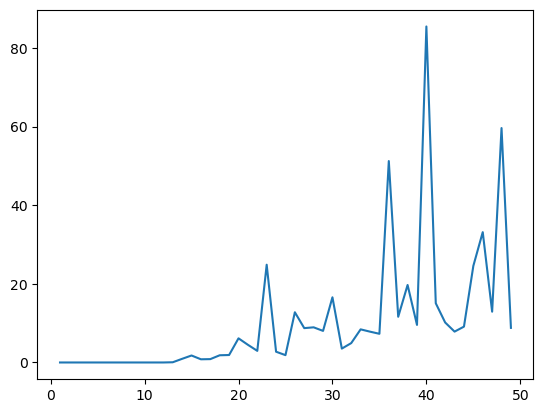

In [540]:
k=50
x=np.arange(1,k,1)
functionI=np.array(np.zeros((k-1)))
for i in range(1,k-1):
    functionI[i]=getInorm(i)
    

print(functionI)
print(x)
mlt.plot(x,functionI)
mlt.show()

Αρχικά, δημιουργείται ο πίνακας t που αντιστοιχεί στο χρόνο και η y συναρτηση που περιέχει τιμές οι οποιές παράγονται από μια συνάρτηση cos(4t) με προσθήκη θορύβου που παράγεται απο μία κανονική κατανομή.

In [541]:
import numpy as np
import pandas as pd
t=np.arange(0,1,0.02)

y= np.cos(4 * t) + 0.1 * np.random.randn(t.shape[0])

print(t)
print(y)

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98]
[ 0.84702414  0.97676365  0.98780997  0.9631688   0.88940775  0.82291082
  0.71410487  0.76264711  0.75763613  0.68203632  0.77416752  0.74063441
  0.44735589  0.45837067  0.37979103  0.31842339  0.26870239  0.02546065
  0.27247799 -0.09221393  0.07030862 -0.05880744 -0.19392083 -0.26717784
 -0.27785916 -0.56339421 -0.35271189 -0.36368922 -0.80157931 -0.65381316
 -0.81941804 -0.7646643  -0.79220517 -0.73996047 -1.13462902 -0.93089519
 -0.95872741 -1.03450513 -1.10229811 -1.08474337 -0.73860427 -1.01705364
 -0.93959548 -0.96388471 -0.78322841 -0.84690601 -0.97384273 -0.82024589
 -0.90303883 -0.80205285]


# Υπολογίσμος των τιμών ενός πολυωνύμου βαθμού 4 που προσεγγίζει βέλτιστα την παραπάνω συνάρτηση, χρησιμοποιώντας τη μέθοδο ελαχίστων τετραγώνων:

In [542]:
A=np.matrix(np.zeros((50,5)))
for j in range(0,5):
    for i in range(0,50):
        A[i,j]=np.power(t[i],j)

print(A)

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 2.0000000e-02 4.0000000e-04 8.0000000e-06 1.6000000e-07]
 [1.0000000e+00 4.0000000e-02 1.6000000e-03 6.4000000e-05 2.5600000e-06]
 [1.0000000e+00 6.0000000e-02 3.6000000e-03 2.1600000e-04 1.2960000e-05]
 [1.0000000e+00 8.0000000e-02 6.4000000e-03 5.1200000e-04 4.0960000e-05]
 [1.0000000e+00 1.0000000e-01 1.0000000e-02 1.0000000e-03 1.0000000e-04]
 [1.0000000e+00 1.2000000e-01 1.4400000e-02 1.7280000e-03 2.0736000e-04]
 [1.0000000e+00 1.4000000e-01 1.9600000e-02 2.7440000e-03 3.8416000e-04]
 [1.0000000e+00 1.6000000e-01 2.5600000e-02 4.0960000e-03 6.5536000e-04]
 [1.0000000e+00 1.8000000e-01 3.2400000e-02 5.8320000e-03 1.0497600e-03]
 [1.0000000e+00 2.0000000e-01 4.0000000e-02 8.0000000e-03 1.6000000e-03]
 [1.0000000e+00 2.2000000e-01 4.8400000e-02 1.0648000e-02 2.3425600e-03]
 [1.0000000e+00 2.4000000e-01 5.7600000e-02 1.3824000e-02 3.3177600e-03]
 [1.0000000e+00 2.6000000e-01 6.7600000e-02 1.75760

# Επίλυση του γραμμικού συστήματος που προκύπτει από την παραγοντοποιήση LU του πίνακα A.T * A

Το διάνυσμα g προκύπτει λύνοντας το σύστημα L * g = b.

Το διάνυσμα x προκύπτει λύνοντας το σύστημα U * x = g.

In [543]:

L,U=LU(A.T*A)

b=A.T*y.reshape(50,1)       
g= np.linalg.inv(L)*b
x= np.linalg.inv(U)*g
print(x)

[[  0.89251002]
 [  1.20256579]
 [-14.93235824]
 [ 16.99794452]
 [ -4.87120472]]


# Επίλυση του γραμμικού συστήματος που προκύπτει από την παραγοντοποιήση QR του πίνακα A.T * A

Το διάνυσμα x προκύπτει λύνοντας το σύστημα R * xnew = Q.T * A.T * y.

In [544]:
Q,R=QR(A.T*A)
xnew=np.linalg.inv(R)*Q.T*A.T*y.reshape(50,1)  
print(xnew)

[[  0.89251002]
 [  1.20256579]
 [-14.93235824]
 [ 16.99794452]
 [ -4.87120472]]


# Το άθροισμα των τετραγωνικών σφαλμάτων με χρήση της παραγοντοποιήσης LU:

In [545]:
f=lambda u:x[0]+u*x[1]+(u**2)*x[2]+(u**3)*x[3]+(u**4)*x[4]
sum=0
for i in range(0,50):
    sum=sum+(f(i/50)-y[i])**2
print(sum)

[[0.51161541]]


# Το άθροισμα των τετραγωνικών σφαλμάτων με χρήση της παραγοντοποιήσης QR:

In [546]:
f1=lambda u:xnew[0]+u*xnew[1]+(u**2)*xnew[2]+(u**3)*xnew[3]+(u**4)*xnew[4]
sum1=0
for i in range(0,50):
    sum1=sum1+(f1(i/50)-y[i])**2
print(sum1)

[[0.51161541]]


# Το διάγραμμα απεικονίζει τα αρχικά δεδομένα και την καμπύλη βέλτιστης προσέγγισης που προκύπτει:

[ 0.89251002  0.9107236   0.91779628  0.91451591  0.90165162  0.87995384
  0.85015431  0.81296605  0.76908337  0.71918188  0.66391848  0.60393138
  0.53984008  0.47224535  0.40172929  0.32885526  0.25416796  0.17819333
  0.10143865  0.02439246 -0.05247537 -0.12871371 -0.20389011 -0.27759084
 -0.34942087 -0.41900387 -0.48598223 -0.55001704 -0.61078809 -0.66799386
 -0.72135158 -0.77059715 -0.81548517 -0.85578898 -0.89130059 -0.92183074
 -0.94720886 -0.9672831  -0.98192029 -0.991006   -0.99444447 -0.99215868
 -0.98409029 -0.97019968 -0.95046592 -0.9248868  -0.89347881 -0.85627714
 -0.8133357  -0.76472709]


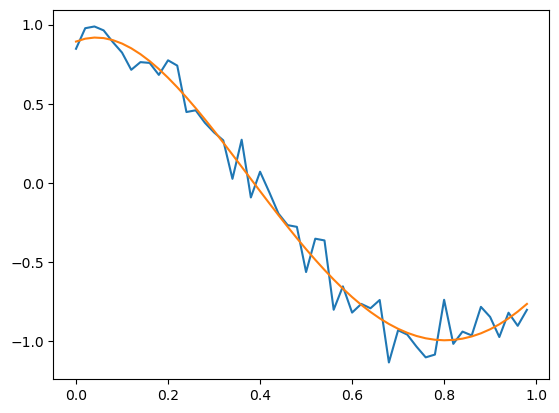

In [550]:
import matplotlib.pyplot as mlt
function=np.array(np.zeros((50)))   # ο πινακας function ειναι αυτος που αποθηκευει τις τιμες του πολυωνυμου
function[0]=x[0]

for i in range(1,50):
    function[i]=f(i/50)
print(function)
mlt.plot(t,y)
mlt.plot(t,function)
mlt.show()